In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, AveragePooling2D, Conv2D, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
train_ds="/content/drive/MyDrive/datasetskincancer/data/train"
test_ds="/content/drive/MyDrive/datasetskincancer/data/test"


# Data preprocessing
****

In [5]:
os.listdir('/content/drive/MyDrive/datasetskincancer/data/train')

['benign', 'malignant']

In [6]:
batch_size=32
img_size=224

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator for training data
train_datagen = ImageDataGenerator(rescale=1./255)

# ImageDataGenerator for test/validation data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the generators
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasetskincancer/train',
    target_size=(32, 32),  # Resize to 32x32
    color_mode='grayscale',  # Convert to grayscale
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/datasetskincancer/test',
    target_size=(32, 32),  # Resize to 32x32
    color_mode='grayscale',  # Convert to grayscale
    batch_size=32,
    class_mode='categorical')


Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


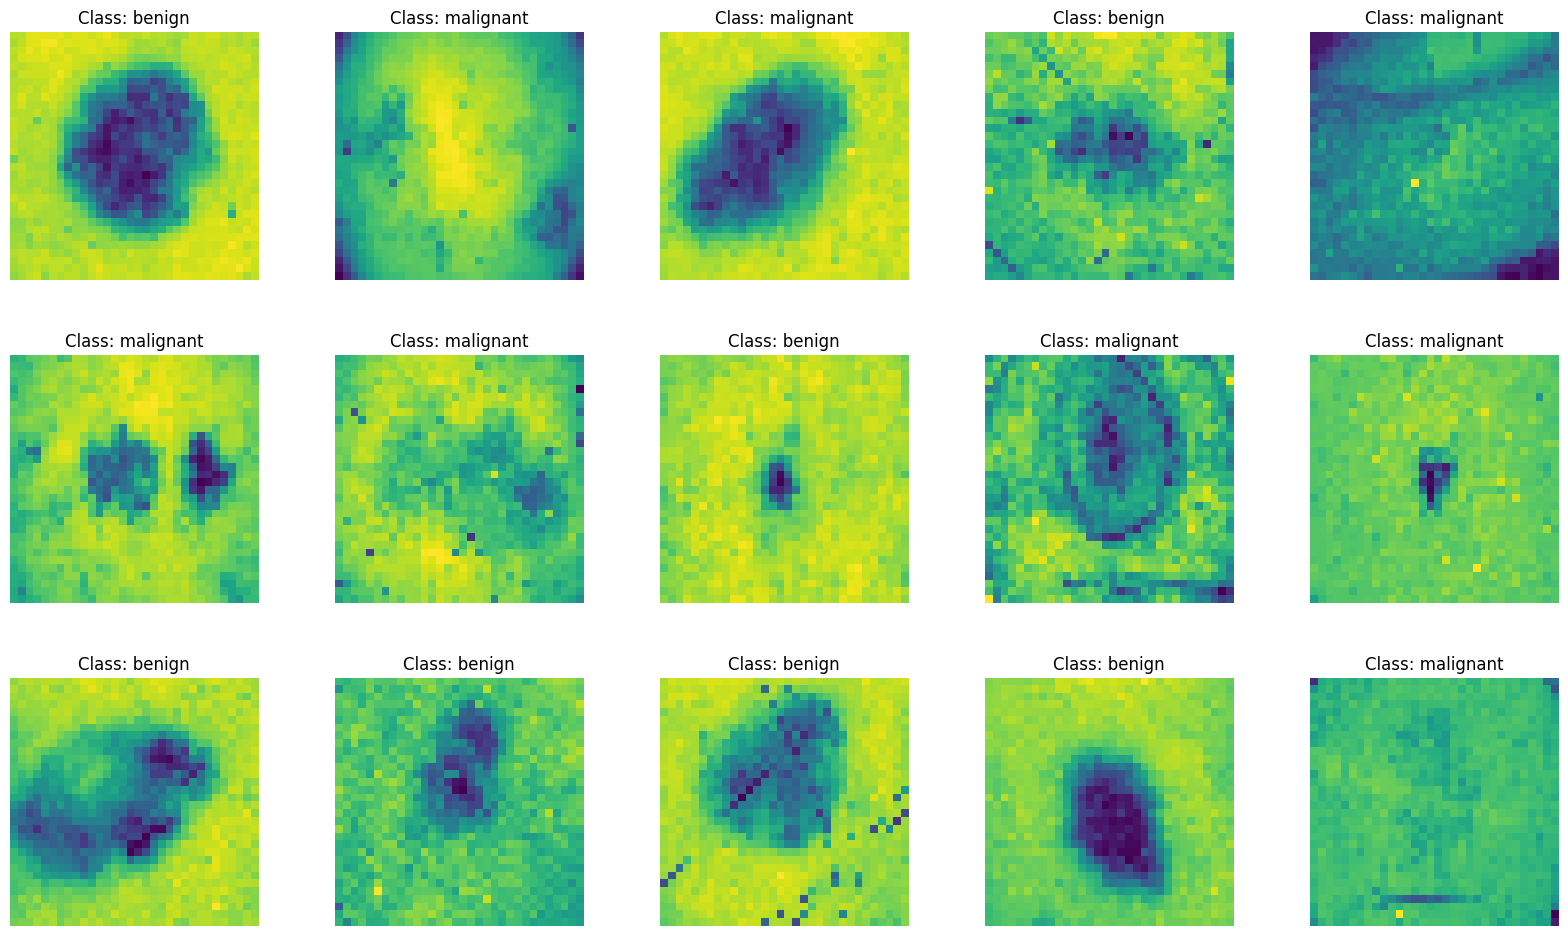

In [32]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [33]:
print(len(train_generator))
print(len(test_ds))


83
50


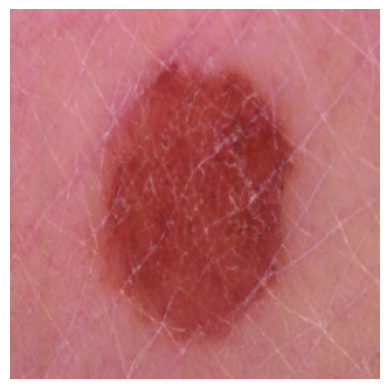

In [34]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/datasetskincancer/data/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [35]:
from keras.layers import MaxPool2D

In [36]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build Lenet-5 Model

In [37]:
from keras.layers import MaxPool2D

In [38]:
from keras.layers import MaxPool2D

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, AveragePooling2D, Conv2D, Dropout, Flatten, Input

# Define input image size for LeNet-5 (typically 32x32 for small image tasks like MNIST)
img_size = 32  # LeNet-5 expects 32x32 grayscale input images
input_shape = (img_size, img_size, 1)  # Use grayscale images, so 1 channel

# Input layer
inputs = Input(shape=input_shape)

# LeNet-5 architecture
x = Conv2D(6, (5, 5), activation='relu', padding='same')(inputs)  # First conv layer (6 filters)
x = AveragePooling2D(pool_size=(2, 2))(x)  # Pooling layer

x = Conv2D(16, (5, 5), activation='relu')(x)  # Second conv layer (16 filters)
x = AveragePooling2D(pool_size=(2, 2))(x)  # Pooling layer

x = Flatten()(x)  # Flattening the layers

# Fully connected layers
x = Dense(120, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization

x = Dense(84, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization

# Output layer for binary classification
outputs = Dense(2, activation='softmax')(x)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#   Model summary

In [40]:
# Print the model summary


model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 32, 32, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 16, 16, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          69,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,146 (320.88 KB)

 Trainable params: 82,146 (320.88 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [42]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [43]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=test_generator)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 996s 11s/step - accuracy: 0.5381 - loss: 0.7056 - val_accuracy: 0.5485 - val_loss: 0.6844
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 62s 169ms/step - accuracy: 0.5481 - loss: 0.6895 - val_accuracy: 0.5500 - val_loss: 0.6843
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.5398 - loss: 0.6947 - val_accuracy: 0.5545 - val_loss: 0.6839
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.5186 - loss: 0.6986 - val_accuracy: 0.5545 - val_loss: 0.6840
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - accuracy: 0.5344 - loss: 0.6965 - val_accuracy: 0.5545 - val_loss: 0.6840
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 171ms/step - accuracy: 0.5543 - loss: 0.6883 - val_accuracy: 0.5545 - val_loss: 0.6841
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 16s 174ms/step - accuracy: 0.5540 - loss: 0.6854 - val_accuracy: 0.5561 - val_loss: 0.6839
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 15s 168ms/step - accuracy: 0.5272 - loss: 0.6904 - val_accuracy:

# Assuming you are using ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Add any other required augmentation
    # ...
)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(32, 32), # Resize images to 32x32
    color_mode='grayscale', # Convert images to grayscale
    # ... other parameters
)

In [44]:
n_categories = len(os.listdir('/content/drive/MyDrive/datasetskincancer/test'))# number of categories print(n_categories)

In [45]:
n_categories

2

In [46]:
results =pd.DataFrame(history.history)
results.head()

,accuracy,loss,val_accuracy,val_loss
0,0.536974,0.697750,0.548485,0.684447
1,0.546834,0.691459,0.550000,0.684286
2,0.537353,0.693592,0.554545,0.683945
3,0.536595,0.692128,0.554545,0.683964
4,0.540766,0.694106,0.554545,0.683984


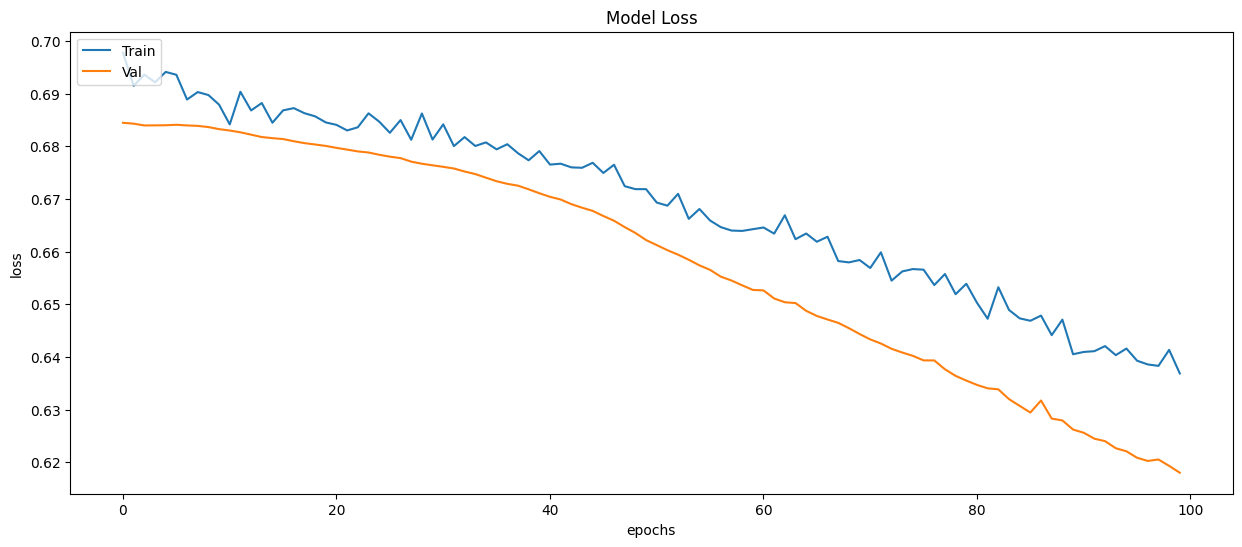

In [47]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

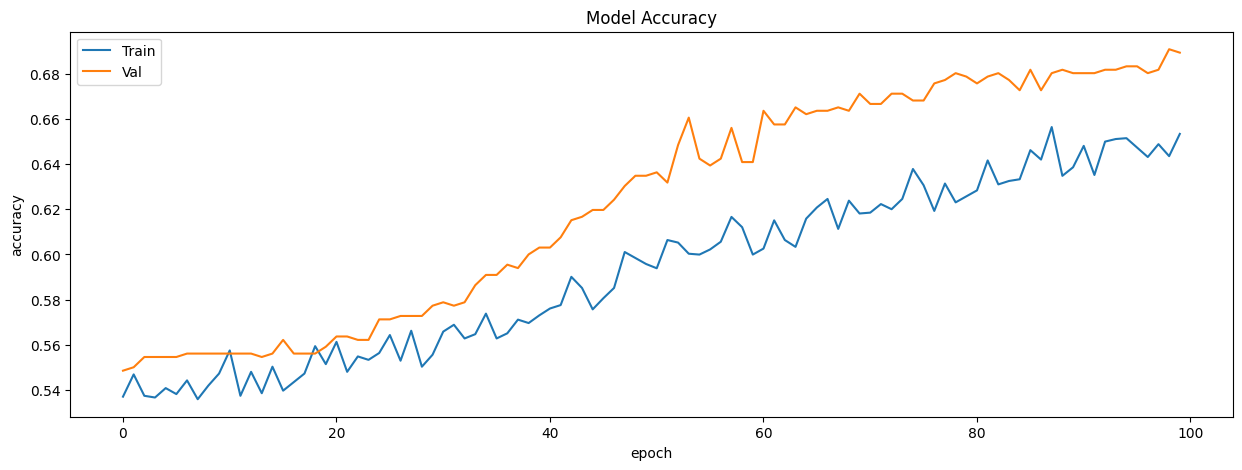

In [48]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [49]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

21/21 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step


In [50]:
results =model.evaluate(test_generator)

21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.6990 - loss: 0.6202


In [51]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix,precision_score, recall_score, roc_curve, f1_score

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.54      0.63      0.59       360
           1       0.45      0.36      0.40       300

    accuracy                           0.51       660
   macro avg       0.50      0.50      0.49       660
weighted avg       0.50      0.51      0.50       660



In [52]:
# Calculate metrics for each class
precision_0 = precision_score(y_test_1, y_pred_1, pos_label=0)
recall_0 = recall_score(y_test_1, y_pred_1, pos_label=0)
f1_0 = f1_score(y_test_1, y_pred_1, pos_label=0)
precision_1 = precision_score(y_test_1, y_pred_1, pos_label=1)
recall_1 = recall_score(y_test_1, y_pred_1, pos_label=1)
f1_1 = f1_score(y_test_1, y_pred_1, pos_label=1)

In [53]:
# Calculate additional metrics
auc = roc_auc_score(y_test_1, y_pred_1)
tn, fp, fn, tp = confusion_matrix(y_test_1, y_pred_1).ravel()
precision = precision_score(y_test_1, y_pred_1)
recall = recall_score(y_test_1, y_pred_1)
specificity = tn / (tn + fp)
fdr = fp / (fp + tp)
fnr = fn / (fn + tp)
fpr = fp / (fp + tn)



# Print additional metrics for each class
print("Additional Metrics for Class 0:")
print(f"Precision: {precision_0:.2f}")
print(f"Recall: {recall_0:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_0:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

print("Additional Metrics for Class 1:")
print(f"Precision: {precision_1:.2f}")
print(f"Recall: {recall_1:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1_1:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}\n")

# Print average metrics
precision_avg = (precision_0 + precision_1) / 2
recall_avg = (recall_0 + recall_1) / 2
f1_avg = (f1_0 + f1_1) / 2

print("Average Metrics:")
print(f"Precision: {precision_avg:.2f}")
print(f"Recall: {recall_avg:.2f}")
print(f"F1 Score: {f1_avg:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"FDR: {fdr:.2f}")
print(f"FNR: {fnr:.2f}")
print(f"FPR: {fpr:.2f}")




Additional Metrics for Class 0:
Precision: 0.54
Recall: 0.63
Specificity: 0.63
F1 Score: 0.59
FDR: 0.55
FNR: 0.64
FPR: 0.37

Additional Metrics for Class 1:
Precision: 0.45
Recall: 0.36
Specificity: 0.63
F1 Score: 0.40
FDR: 0.55
FNR: 0.64
FPR: 0.37

Average Metrics:
Precision: 0.50
Recall: 0.50
F1 Score: 0.49
AUC: 0.50
Specificity: 0.63
FDR: 0.55
FNR: 0.64
FPR: 0.37


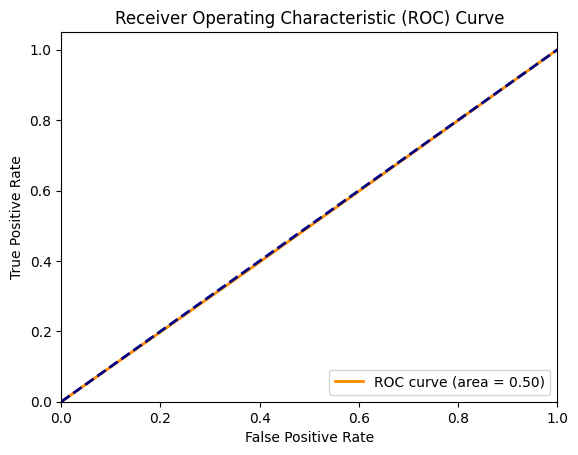

In [54]:
import matplotlib.pyplot as plt
# Calculate ROC curve
fpr_values, tpr_values, _ = roc_curve(y_test_1, y_pred_1)

# Plot ROC curve
plt.figure()
plt.plot(fpr_values, tpr_values, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


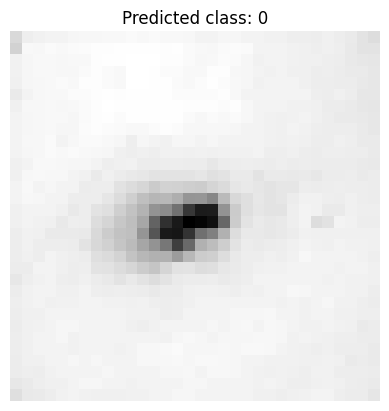

In [58]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/datasetskincancer/data/test/benign'
img_size = 32



images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path).convert('L') # convert image to grayscale
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0
images = images.reshape(-1, img_size, img_size, 1) # add a dimension for the single color channel

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index].squeeze(), cmap='gray') # remove the extra dimension and display as grayscale
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [59]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : benign
Class probability: 0.7000158
Predicted class for 2.jpg : benign
Class probability: 0.5554608
Predicted class for 3.jpg : malignant
Class probability: 0.6789426
Predicted class for 4.jpg : benign
Class probability: 0.6486062
Predicted class for 5.jpg : benign
Class probability: 0.7292816
Predicted class for 6.jpg : benign
Class probability: 0.612575
Predicted class for 7.jpg : benign
Class probability: 0.5721601
Predicted class for 8.jpg : benign
Class probability: 0.68224734
Predicted class for 9.jpg : benign
Class probability: 0.7164339
Predicted class for 10.jpg : benign
Class probability: 0.6135734
Predicted class for 11.jpg : malignant
Class probability: 0.500819
Predicted class for 12.jpg : benign
Class probability: 0.6246808
Predicted class for 13.jpg : malignant
Class probability: 0.50189865
Predicted class for 14.jpg : benign
Class probability: 0.6307364
Predicted class for 15.jpg : benign
Class probability: 0.63456124
Predicted class for 16.j